# Objective 
- To determine the factors for loan approvals or rejections

# Contextualize Your Data:
## What are the columns/Features? Provide explanations for your Features

1. **no_of_dependents** - Number of dependents applicant is finamciallr responsible for 	
2. **education** - Level of education of the applicant 
3. self_employed - is applicant self employed or not 
4. income_annum - Income per annum of the applicant 
3. loan_amount - Loan amount requested by applicant 
4. loan_term - loan payment duration 
5. cibil_score - Applicants credit score
6. residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value respective asset valuations
10. loan_status - Approval rejection status 

# Loan Approval Analysis 

In [1]:
# Import Libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("/home/western/Downloads/archive/loan_approval_dataset.csv")
 

df.head(15)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [11]:
df.tail(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4259,4260,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
4260,4261,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved
4261,4262,3,Graduate,Yes,3000000,7500000,6,881,1400000,4500000,6100000,2300000,Approved
4262,4263,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
4263,4264,3,Graduate,No,5000000,12700000,14,865,4700000,8100000,19500000,6300000,Approved
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


## Descriptive stats 

In [4]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [5]:
df.describe(include='O')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [7]:
df[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [ ]:
df.shape

# Data Cleaning
### Missing values

In [ ]:

df.isnull().sum()

### Remove zero variance variable 
- If a column only contains value '1',  single country name 

In [8]:
zero_variance = [col for col in df.columns if df[col].nunique()==1]

df = df.drop(columns=zero_variance)

if zero_variance:
    print('Removed columns with zero varaince', zero_variance)
else:
    print("No columns found")

No columns found


### Unique value - Case Dependent
- Check the usefulness of the column 

In [9]:
unique_value = [col for col in df.columns if df[col].nunique()== len(df)]

df = df.drop(columns=zero_variance)

if unique_value:
    print('Removed columns with zero varaince', unique_value)
else:
    print("No columns found")


Removed columns with zero varaince ['loan_id']


### White Spaces 

In [14]:
# Remove white spaces in the columns 
df.columns = df.columns.str.strip()

# Remove in the entire dataframe 
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


- Removed White spaces from columns and data values 

In [13]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Absolute values
- Column had negative values. Converted them to positive integers using the abs() method

In [15]:
df['residential_assets_value'] = df['residential_assets_value'].abs()

In [16]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.473928e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.502129e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### Other Data Cleaning steps 

- Remove duplicates
- Data/units consistency 

## Feature Engineering 
- Create new features to enhace your data analysis. 
- New features should convey/match your objectives

### Income levels
- Demographics; group by income levels 

In [17]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [18]:
def income_levels(value):
    if 100000 <= value <=1000000:
        return "Low"
    elif 100001 <= value <=4000000:
        return "Low-Middle"
    elif 4000001 <= value <=7500000:
        return "Upper-Middle"
    elif 7500000 <= value <=10000000:
        return "High"
    else:
        return "Very High"
    
df['income_levels'] = df['income_annum'].apply(income_levels)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
 13  income_levels             4269 non-null   object
dtypes: int64(10), object(4)


### Loan Range 

In [19]:

def loan_ranges(value):
    if 100000 <= value <=10000000:
        return "Bronze"
    elif 10000001 <= value <= 20000001:
        return "Silver"
    elif 20000001 <= value <= 30000001:
        return "Gold"
    else:
        return "Platinum"

    
df['loan_range'] = df['income_annum'].apply(loan_ranges)


### Cibil rating

In [21]:
def cibil_ratings(value):
    if 300<= value <= 549:
        return 'poor'
    elif 550<= value<=649:
        return 'average'
    elif 650<= value<=749:
        return 'good'
    elif 750 <=value<= 999:
        return 'excellent'
    else:
        return 'error'

df['cibil_rating']=df['cibil_score'].apply(cibil_ratings)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
 13  income_levels             4269 non-null   object
 14  loan_range              

# Data Distributions 

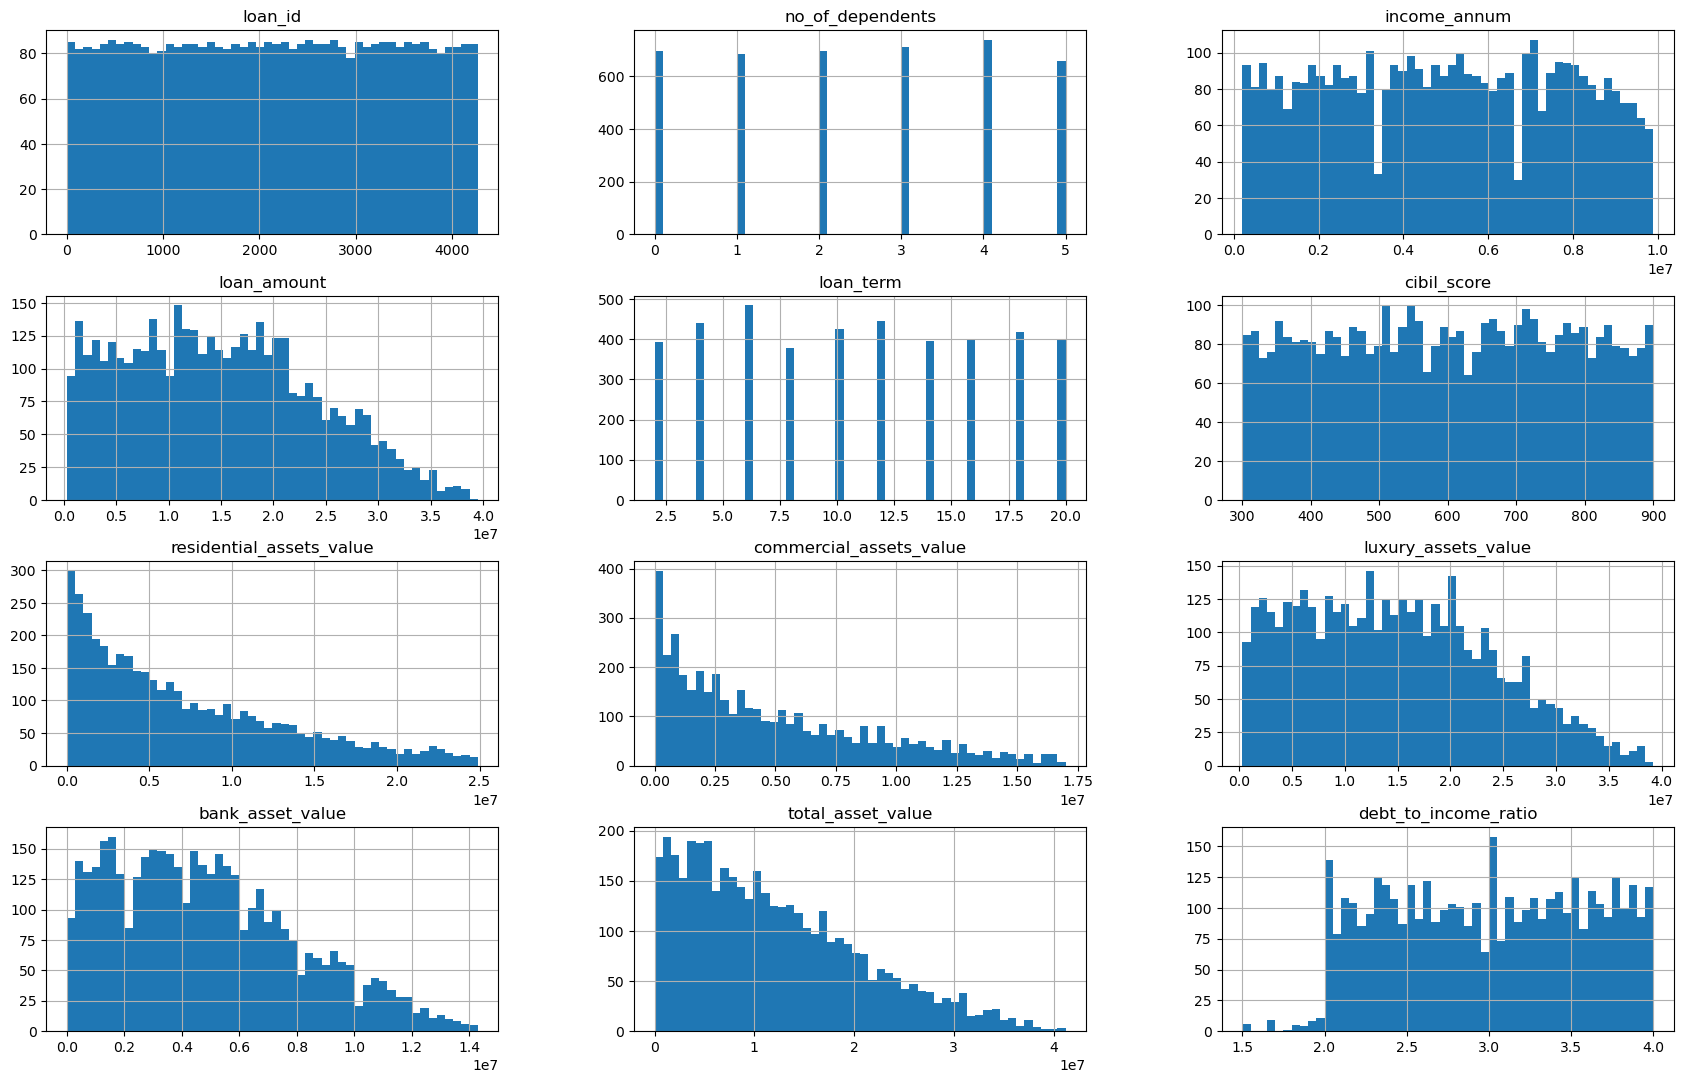

In [77]:
df.hist(bins=50, figsize=(21,13));


**General Insights**
- Most distributions (loan amount, asset values) show right-skewed behavior, which is typical for financial datasets, as only a small proportion of borrowers typically hold high-value assets or large loans.
- Loan terms and income exhibit uniform distributions, indicating broader coverage across categories.
- These insights suggest a wide range of borrower profiles, with a significant portion having modest financial standing in terms of assets and loans.
- Base on data distribution, you will determine the type of analysis eg. spearman or pearson correlation

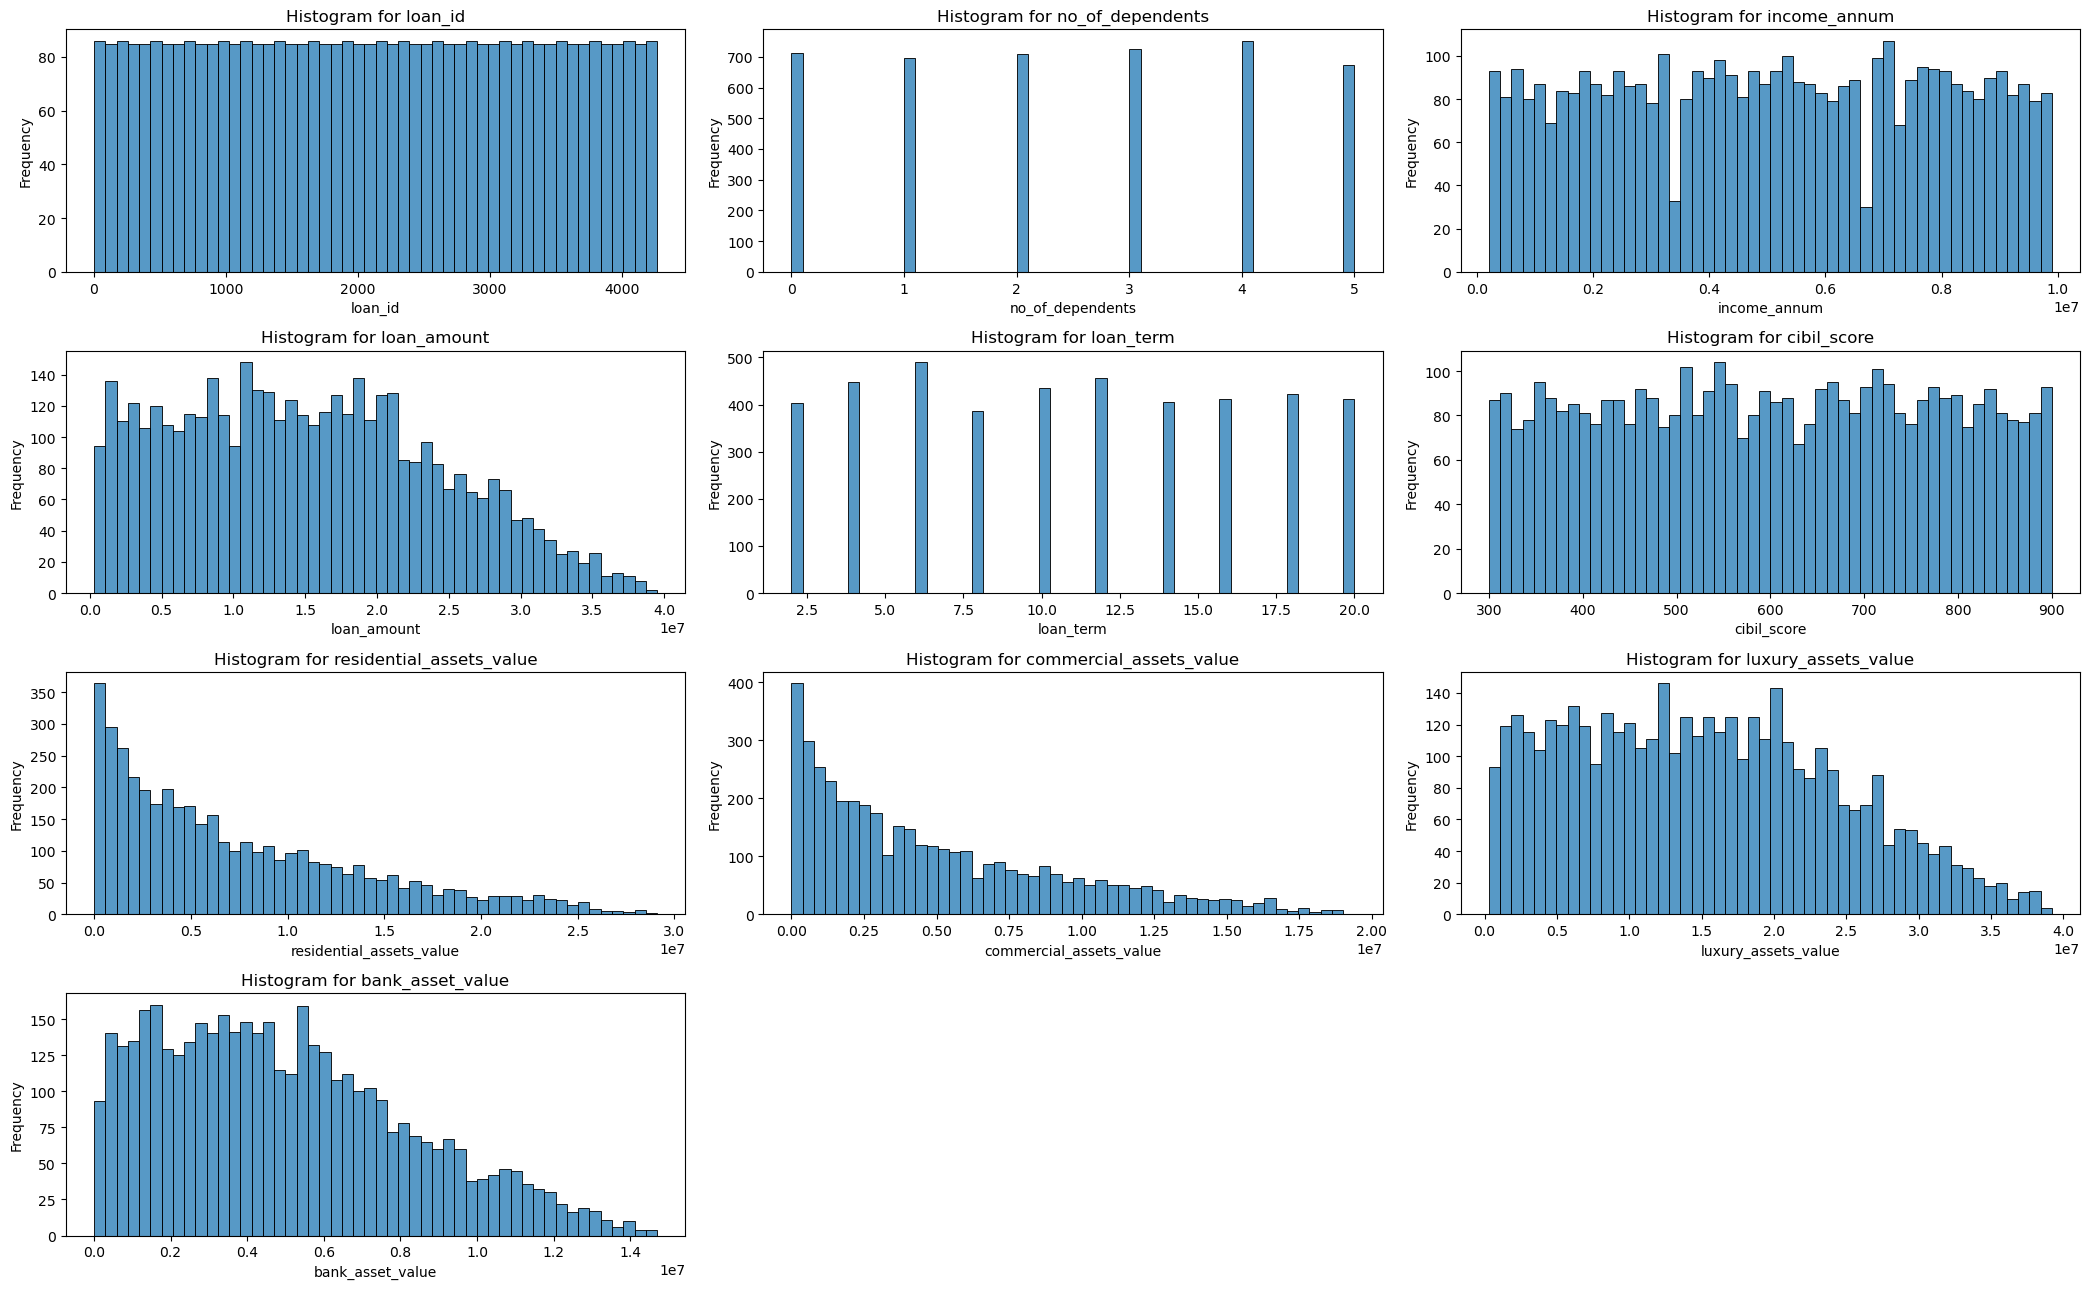

In [31]:
# Only select numeric columns 
numeric_columns = df.select_dtypes(include=['number']).columns[:]

# Define grd layout 
rows, cols = 4,3
fig, axes = plt.subplots(rows, cols, figsize=(21,13))

# Flatten the arrays 
axes = axes.flatten()

# Plot histograms for numeric columns 
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], bins=50, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    
    
#Hide empty subplots 
for j in range (i + 1, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- Use For loop for easier iteration when having many columns 

## Distribution for categorical columns 

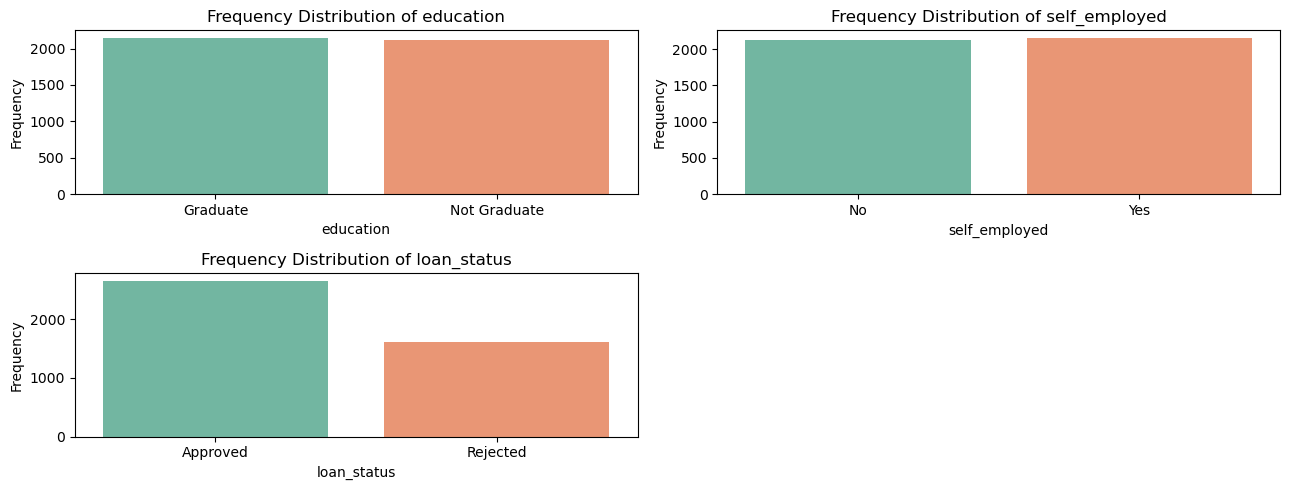

In [32]:
# Specify the categorical columns you want to plot
cat_columns = [ "education", "self_employed", "loan_status" ]

# Define grid layout for the subplots
rows, cols = 2, 2  # Adjusted grid layout since you have 2 columns to plot
fig, axes = plt.subplots(rows, cols, figsize=(13, 5))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Loop through each column and plot using Seaborn's countplot
for i, column in enumerate(cat_columns):
    # Use Seaborn's countplot for categorical data
    sns.countplot(data=df, x=column, ax=axes[i], palette='Set2', hue=column)
    
    # Set plot title and labels
    axes[i].set_title(f'Frequency Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=0)  # Rotate x labels for readability

    
# Hide empty subplots 
for j in range (i + 1, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### **General Observations**
- The categorical variables exhibit relatively balanced distributions across their classes, providing a diverse dataset for analysis.
- The slight imbalance in loan approvals (more approvals) suggests that the approval criteria may not be overly stringent or that applicants are well-prepared.

## Outlier Detection 
1. Box plots 

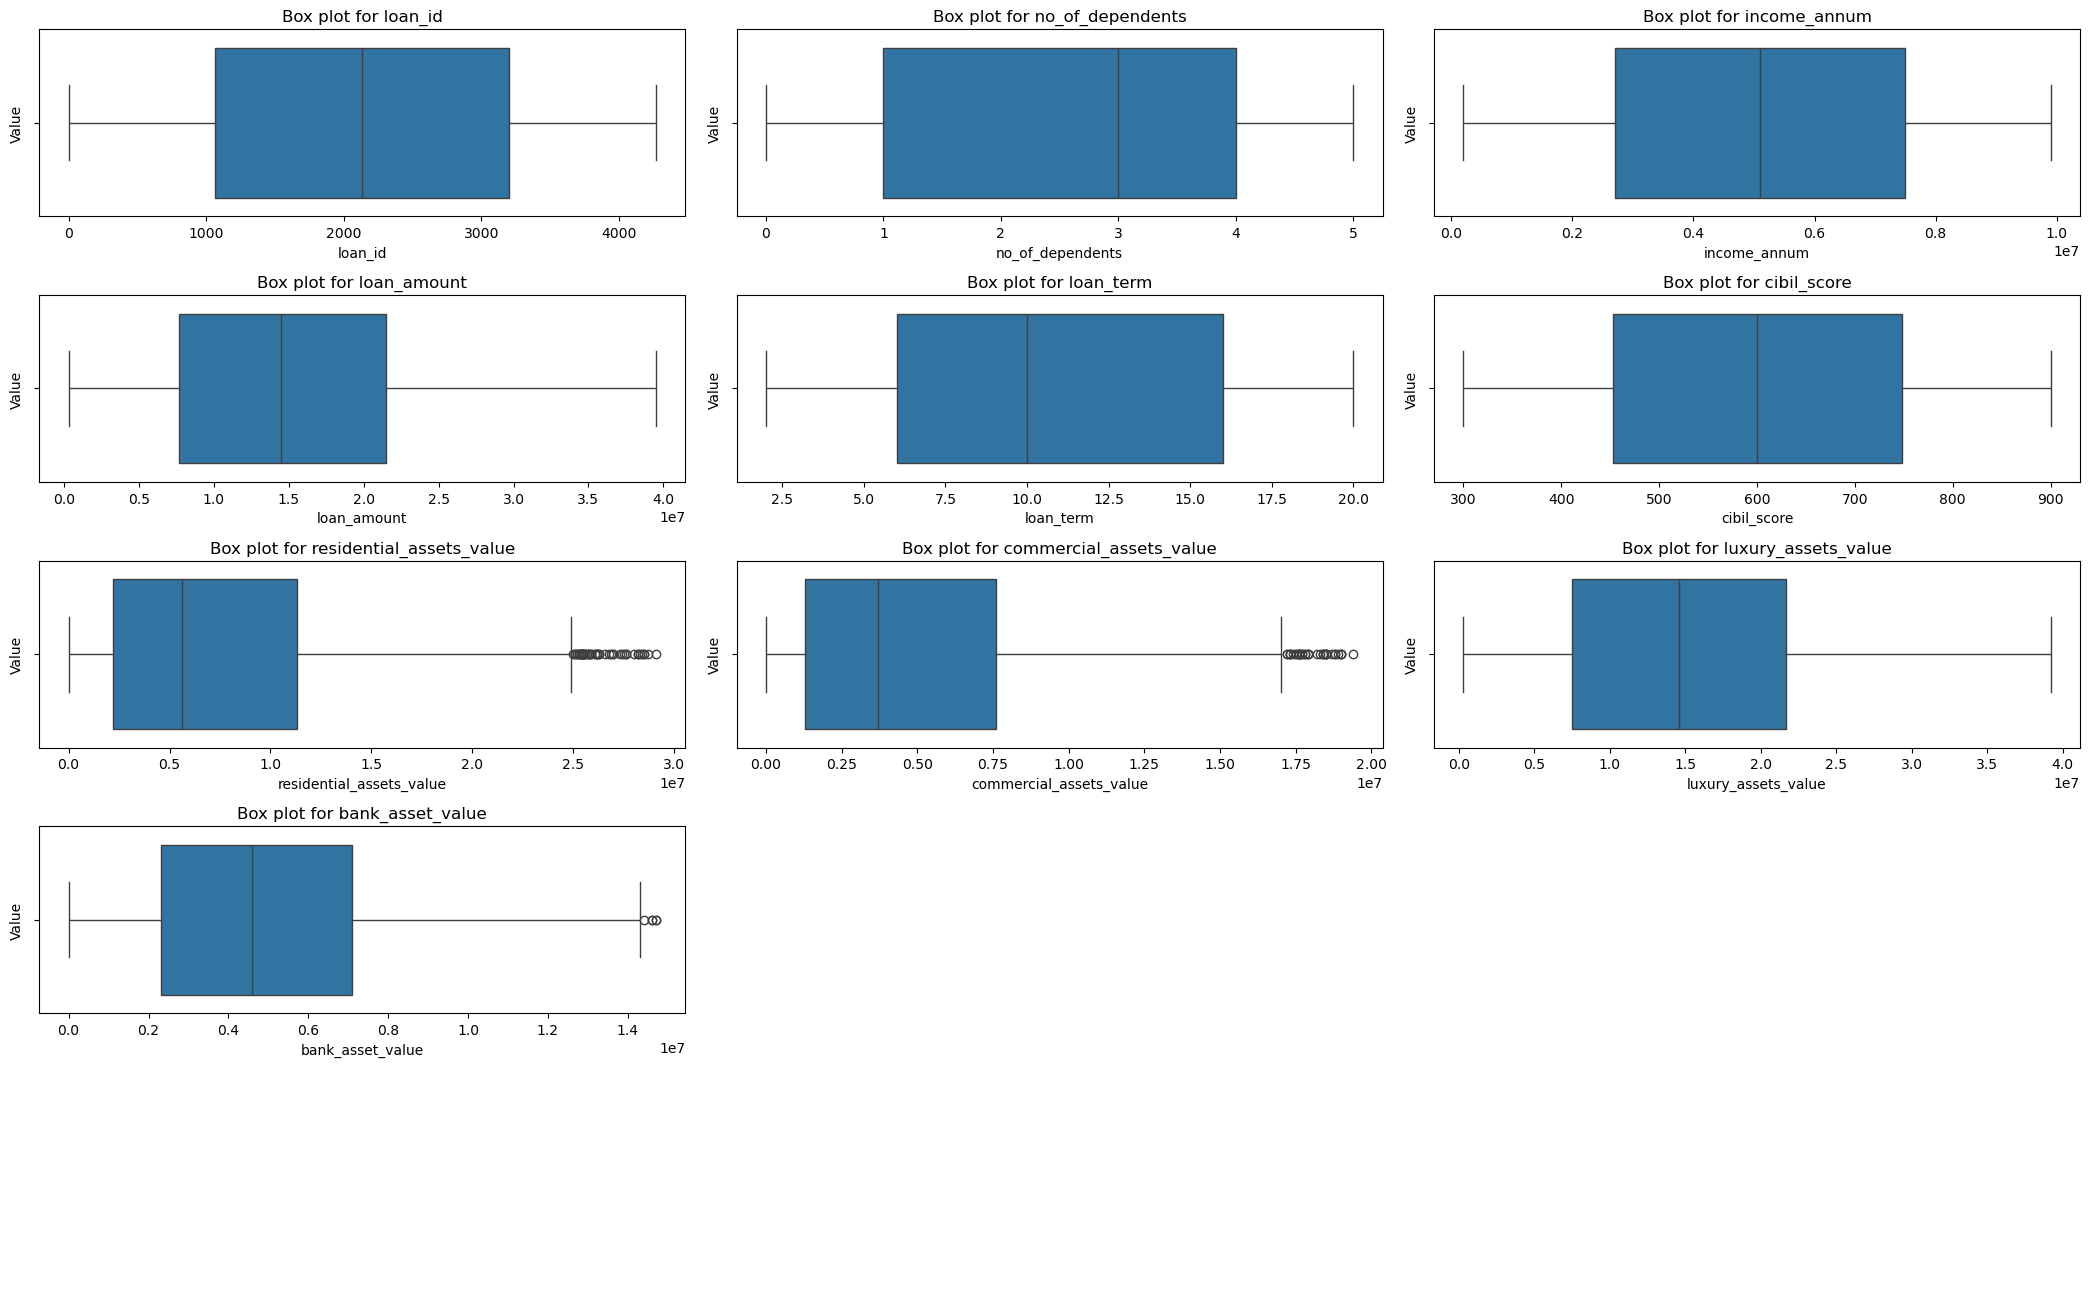

In [33]:
# Grid layout
rows, cols = 5, 3
fig, axes = plt.subplots(rows, cols, figsize=(21, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()


- Generally, our data is not affected by outliers except for features `commercial_asset_value` and `residential_asset_value`, where outliers indicate highly expensive assets

## Outlire removal methods 
- IQR - non-normal distribution 
- Z-method - normal distibution 


In [34]:
# Create a copy of the data
data_copy = df.copy()

# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=['number'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.25)  # .25
q3 = numeric_data.quantile(0.75)  # .75
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(data_copy)

# Remove rows with outliers from the original DataFrame (important!)
data_copy = data_copy.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(data_copy)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

df = data_copy.copy()


Number of rows before removing outliers: 4269
Number of rows after removing outliers: 4178
Number of rows removed: 91


**Observations**
- Using interquartile ranges we can remove the outliers with lower bound of 0.25 and upper bound of 0.75
- Removes 91 rows 

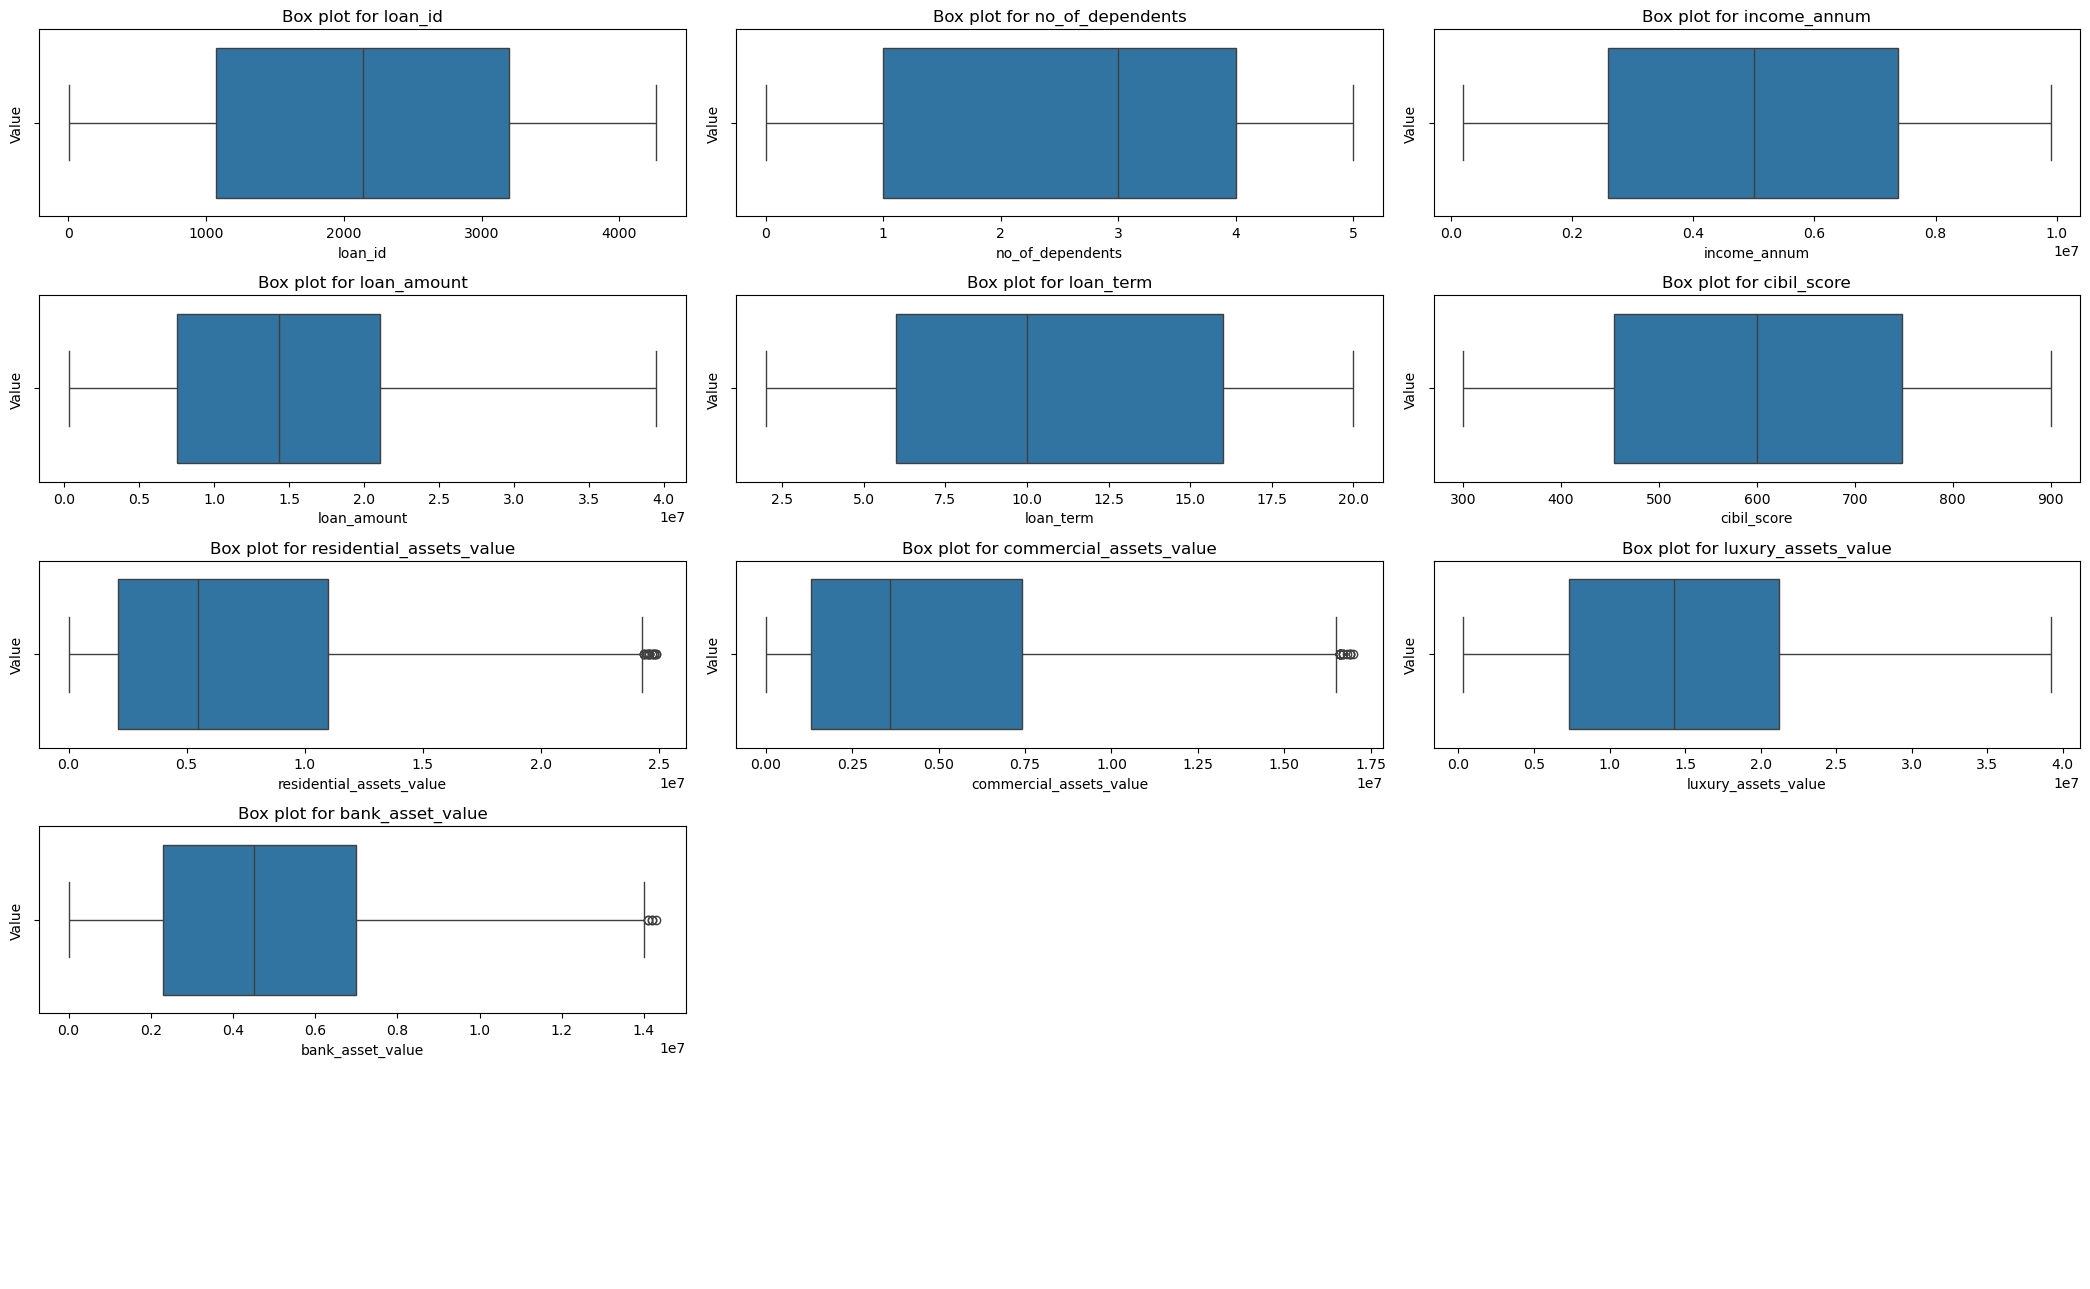

In [35]:
# Grid layout
rows, cols = 5, 3
fig, axes = plt.subplots(rows, cols, figsize=(21, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

- General Observations:
- Many variables (e.g., asset values, loan amount) show a right skew, indicating a small number of customers with higher values.
- Outliers are more prominent in asset-related columns (e.g., residential, commercial, and bank assets), suggesting that a few customers have significantly higher financial standing than the majority.


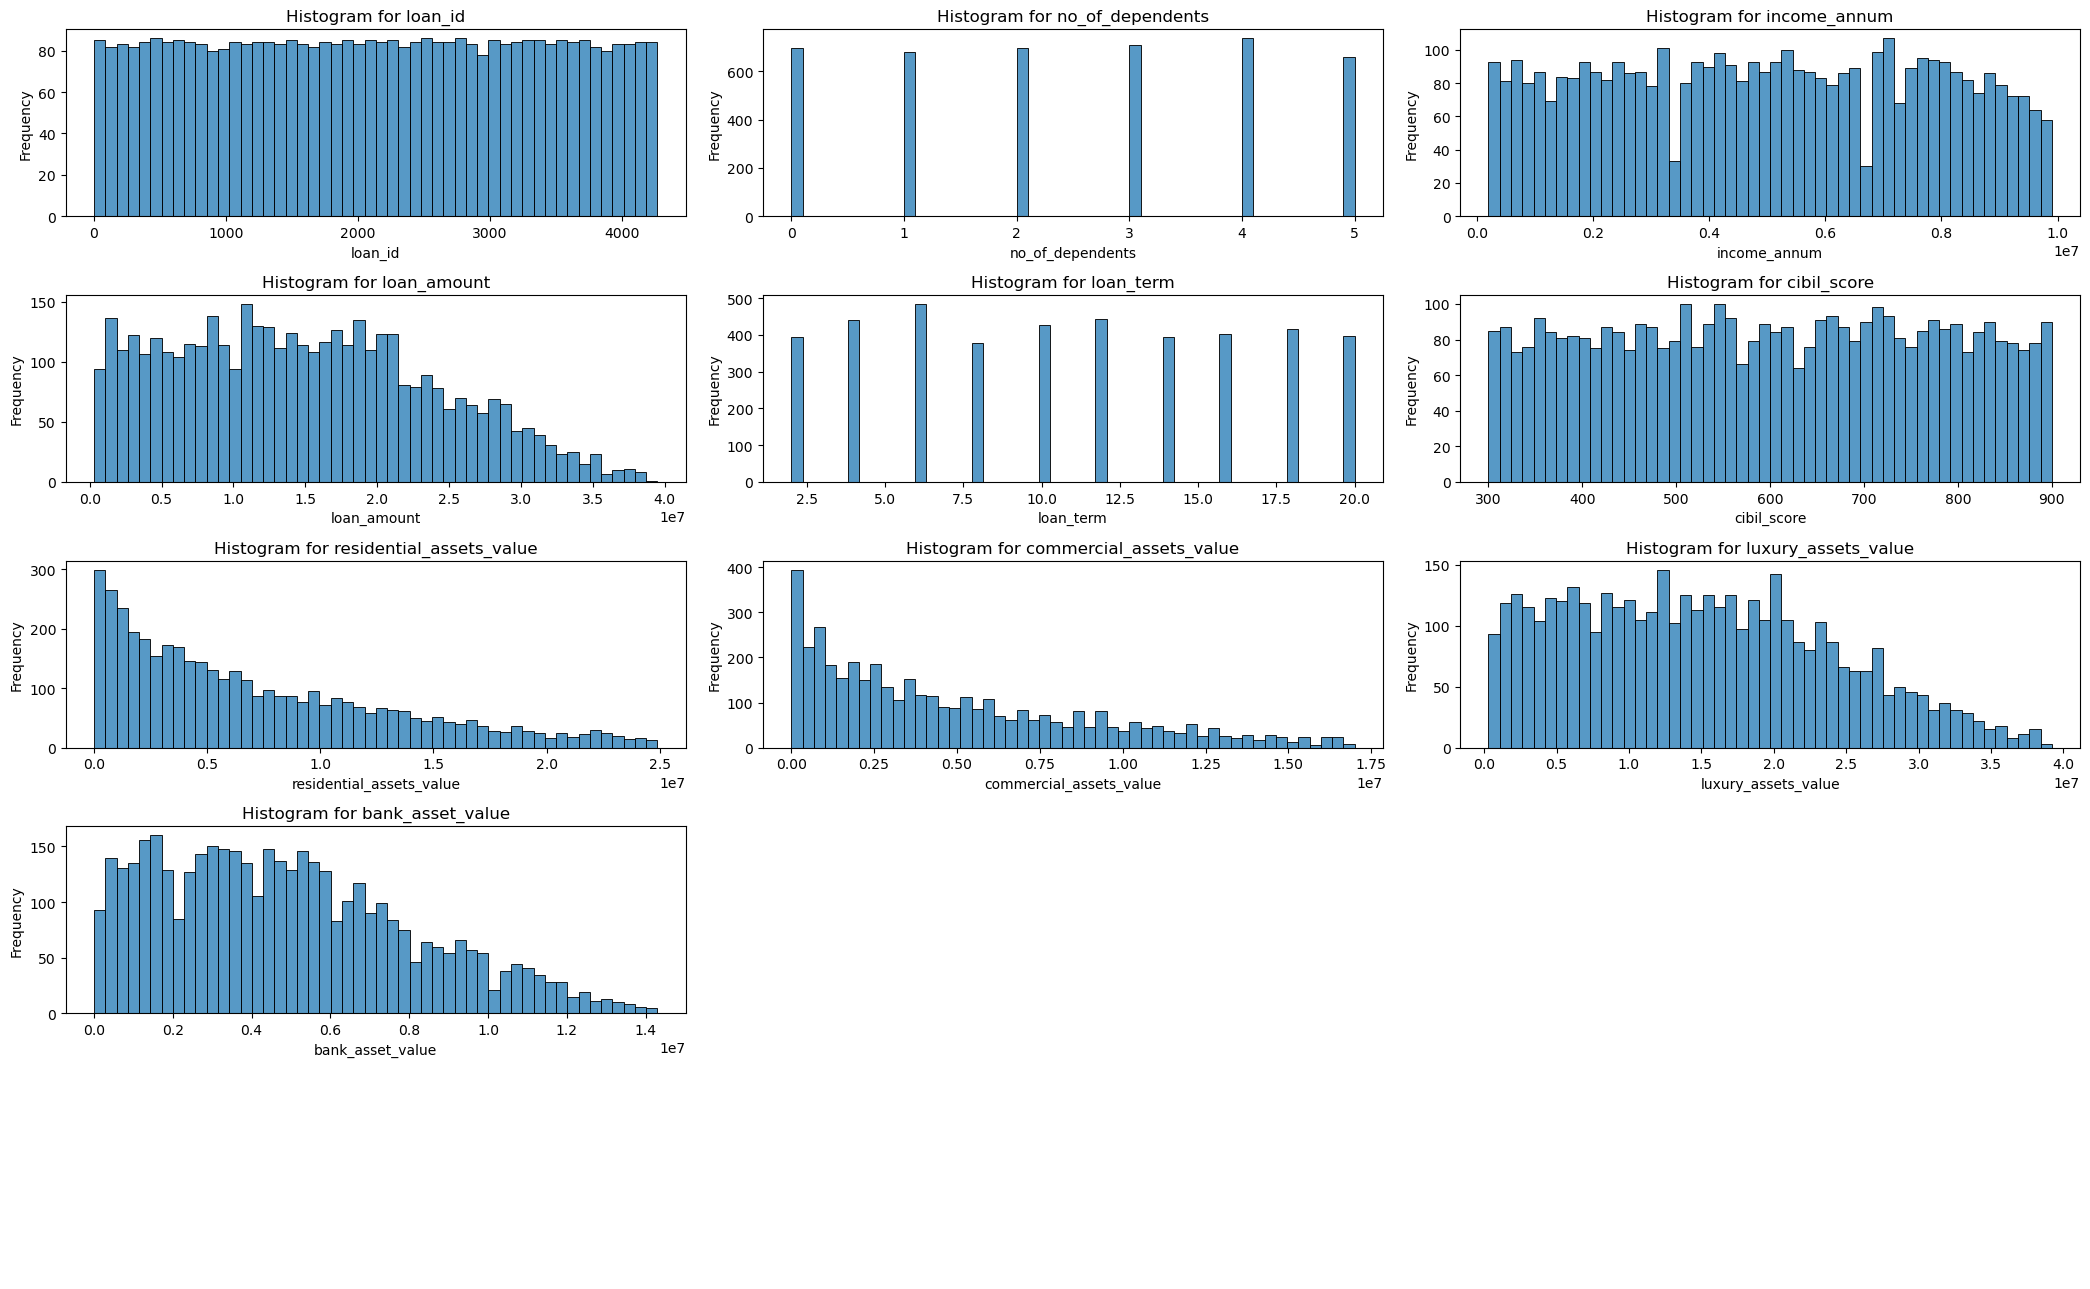

In [36]:
# Only select numeric columns 
numeric_columns = df.select_dtypes(include=['number']).columns[:]

# Define grd layout 
rows, cols = 5,3
fig, axes = plt.subplots(rows, cols, figsize=(21,13))

# Flatten the arrays 
axes = axes.flatten()

# Plot histograms for numeric columns 
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], bins=50, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    
    
# Hide empty subplots 
for j in range (i + 1, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Feature Engineering 

In [37]:
# Create total_assets_value ets_value + bank_asset_value.
df['total_asset_value'] =  df['residential_assets_value'] + df['commercial_assets_value'] 
+ df['luxury_assets_value'] + df['bank_asset_value']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4178 entries, 1 to 4268
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4178 non-null   int64 
 1   no_of_dependents          4178 non-null   int64 
 2   education                 4178 non-null   object
 3   self_employed             4178 non-null   object
 4   income_annum              4178 non-null   int64 
 5   loan_amount               4178 non-null   int64 
 6   loan_term                 4178 non-null   int64 
 7   cibil_score               4178 non-null   int64 
 8   residential_assets_value  4178 non-null   int64 
 9   commercial_assets_value   4178 non-null   int64 
 10  luxury_assets_value       4178 non-null   int64 
 11  bank_asset_value          4178 non-null   int64 
 12  loan_status               4178 non-null   object
 13  income_levels             4178 non-null   object
 14  loan_range                417

- `total_asset_value` provides a comprehensive measureof a applicants total wealth and financial standing 
- Lenders can use this to assess applicants repayment ability or provide colatteral  fo 
- Higher total asset reduces perceived risk for lenders 

In [38]:
# Creating new column with formula: debt_to_income_ratio = loan_amount / income_annum
df['debt_to_income_ratio'] = df['loan_amount'] / df['income_annum']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4178 entries, 1 to 4268
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   4178 non-null   int64  
 1   no_of_dependents          4178 non-null   int64  
 2   education                 4178 non-null   object 
 3   self_employed             4178 non-null   object 
 4   income_annum              4178 non-null   int64  
 5   loan_amount               4178 non-null   int64  
 6   loan_term                 4178 non-null   int64  
 7   cibil_score               4178 non-null   int64  
 8   residential_assets_value  4178 non-null   int64  
 9   commercial_assets_value   4178 non-null   int64  
 10  luxury_assets_value       4178 non-null   int64  
 11  bank_asset_value          4178 non-null   int64  
 12  loan_status               4178 non-null   object 
 13  income_levels             4178 non-null   object 
 14  loan_range   

 - Applicants annual income that will be allocated to repay the loan 
 - Asesses tha applicants ability to handle additional debt 
 - Lower DTI indicates better finacial health and high likelihood of loian application

## Univariate 

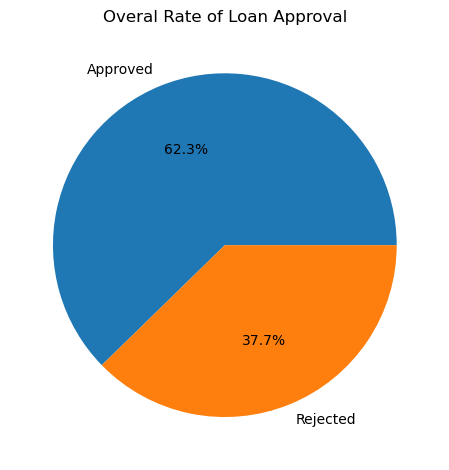

In [39]:
# Rate of loan approvals 
loans = df['loan_status'].value_counts().reset_index()


plt.pie(loans['count'], labels=loans['loan_status'], autopct= '%1.1f%%')
plt.title("Overal Rate of Loan Approval")
plt.tight_layout()
plt.show()

In [ ]:
# import plotly.express as px

# fig = px.pie(loans, values='count',
#             names='loan_status', color= 'loan_status',
#             title = 'Loan Approval Rates')

# fig.update_layout(width=900, height=400
# )

In [43]:
#income_levels
# Rate of loan approvals 
income_levels= df['income_levels'].value_counts().reset_index()

income_levels


,income_levels,count
0,Upper-Middle,1548
1,Low-Middle,1284
2,High,956
3,Low,390


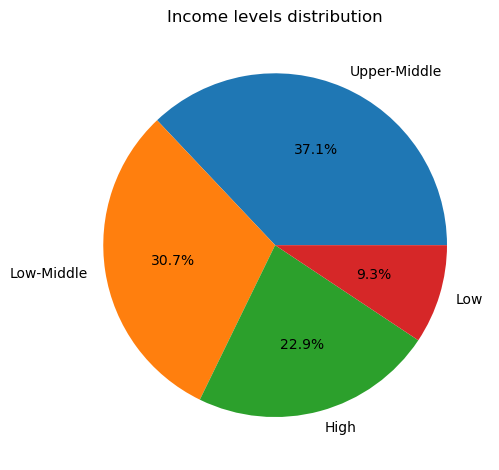

In [44]:
plt.pie(income_levels['count'], labels=income_levels['income_levels'], autopct= '%1.1f%%')
plt.title("Income levels distribution")
plt.tight_layout()
plt.show()

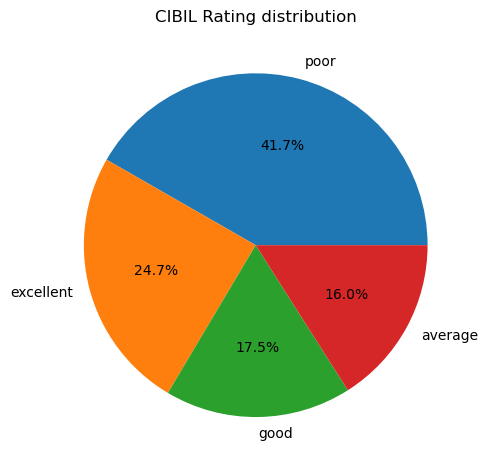

In [46]:
cibil_rating= df['cibil_rating'].value_counts().reset_index()

cibil_rating

plt.pie(cibil_rating['count'], labels=cibil_rating['cibil_rating'], autopct= '%1.1f%%')
plt.title("CIBIL Rating distribution")
plt.tight_layout()
plt.show()


# Bivariate Analysis 

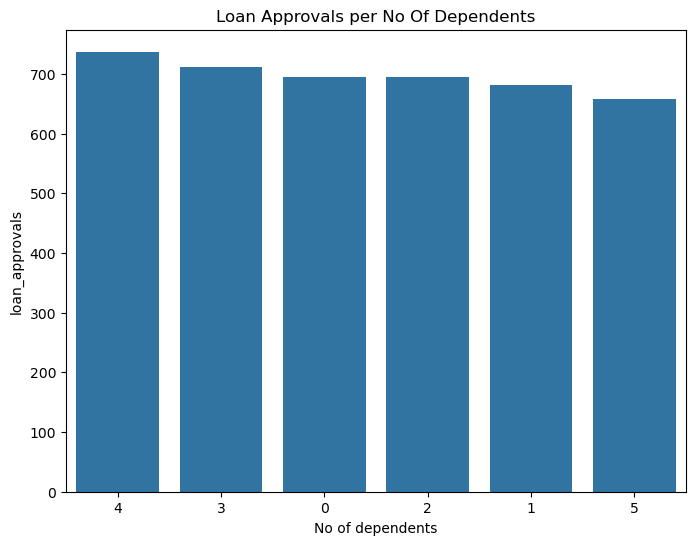

In [47]:
# Group by no. of devendents and loan status 
loan_approval_per_dependent = df.groupby("no_of_dependents")['loan_status'].count()
loan_approval_df = loan_approval_per_dependent.reset_index(name='loan_approvals')

loan_approval_df = loan_approval_df.sort_values(by='loan_approvals', ascending=False)

loan_approval_df['no_of_dependents'] = loan_approval_df['no_of_dependents'].astype(str)

plt.figure(figsize=(8, 6))
sns.barplot(x=loan_approval_df['no_of_dependents'],y=loan_approval_df['loan_approvals'])
plt.title("Loan Approvals per No Of Dependents")
plt.xlabel("No of dependents")
plt.show() 



### Comment 
- Clients with 4 dependents were approved for higher loan amounts, whereas those with 1 dependent received the lowest loan approvals.
- Dont-use this (count) for insights. 

## Loan Approvals by employment

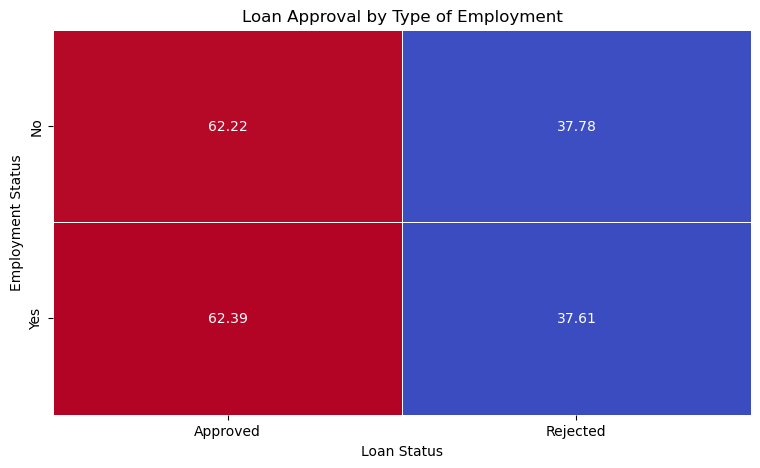

In [55]:
# Rate of loan approval according to self employed

# Group by 'self_employed' and 'loan_status', and count the occurrences
grouped_df = df.groupby(['self_employed', 'loan_status']).size().reset_index(name='count')

grouped_df

# Create a contingency table
contingency_table = grouped_df.pivot_table(index='self_employed', columns='loan_status', values='count', fill_value=0)

contingency_table

# Getting percentages from our pivot table
row_total = contingency_table.sum(axis=1)
row_percentages = contingency_table.div(row_total, axis=0)*100

# create a heatmap 
plt.figure(figsize=(9, 5))
sns.heatmap(row_percentages, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=False)

plt.title('Loan Approval by Type of Employment')
plt.xlabel('Loan Status')
plt.ylabel('Employment Status')
          
plt.show()



# # Plotting the contingency table
# contingency_table.plot(kind='bar', )
# plt.title('Loan Status by Employment Status')
# plt.xlabel('Self Employed')
# plt.ylabel('Count of Loans')




- Wheter employed or not, you have a 62% chance of getting a loan

## Correlation Matrix

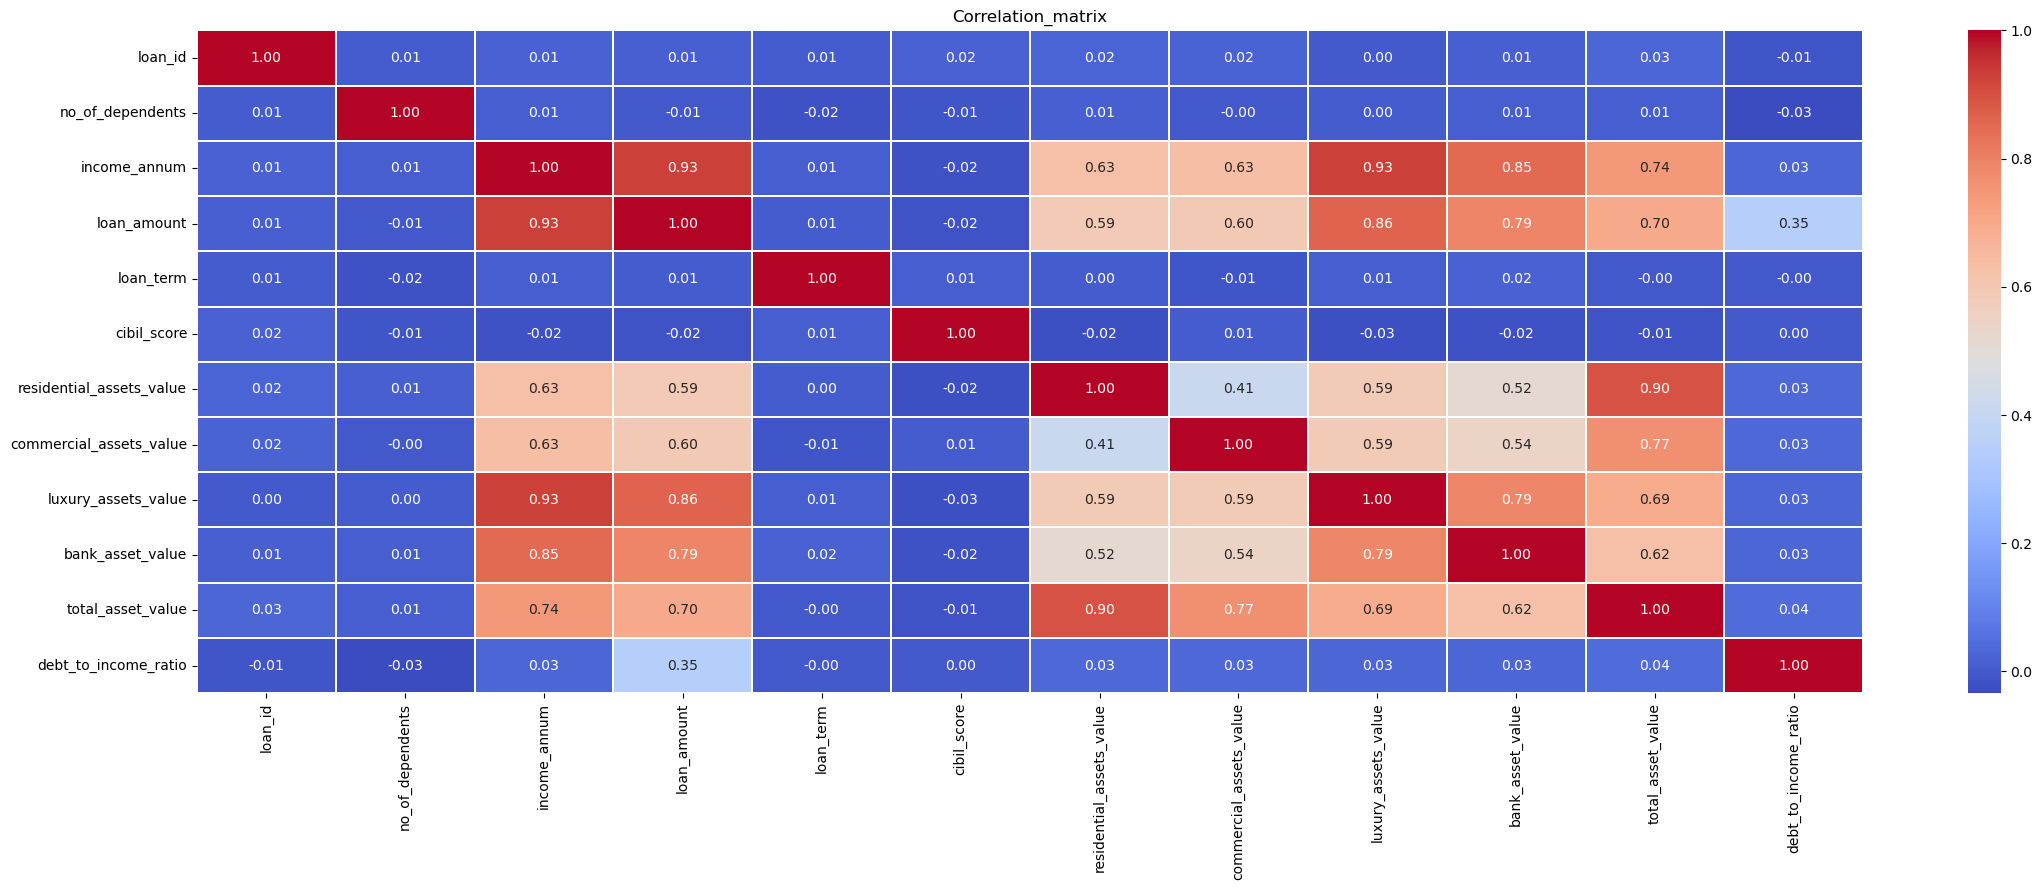

In [56]:
numeric_df = df.select_dtypes(include=["number"])


correlation_matrix = numeric_df.corr(method='pearson')

plt.figure(figsize=(23, 9))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1)

plt.title("Correlation_matrix")

plt.tight_layout()
plt.show()

## Sperman for data that is not normally distribution 
- Use Spearman correlation 


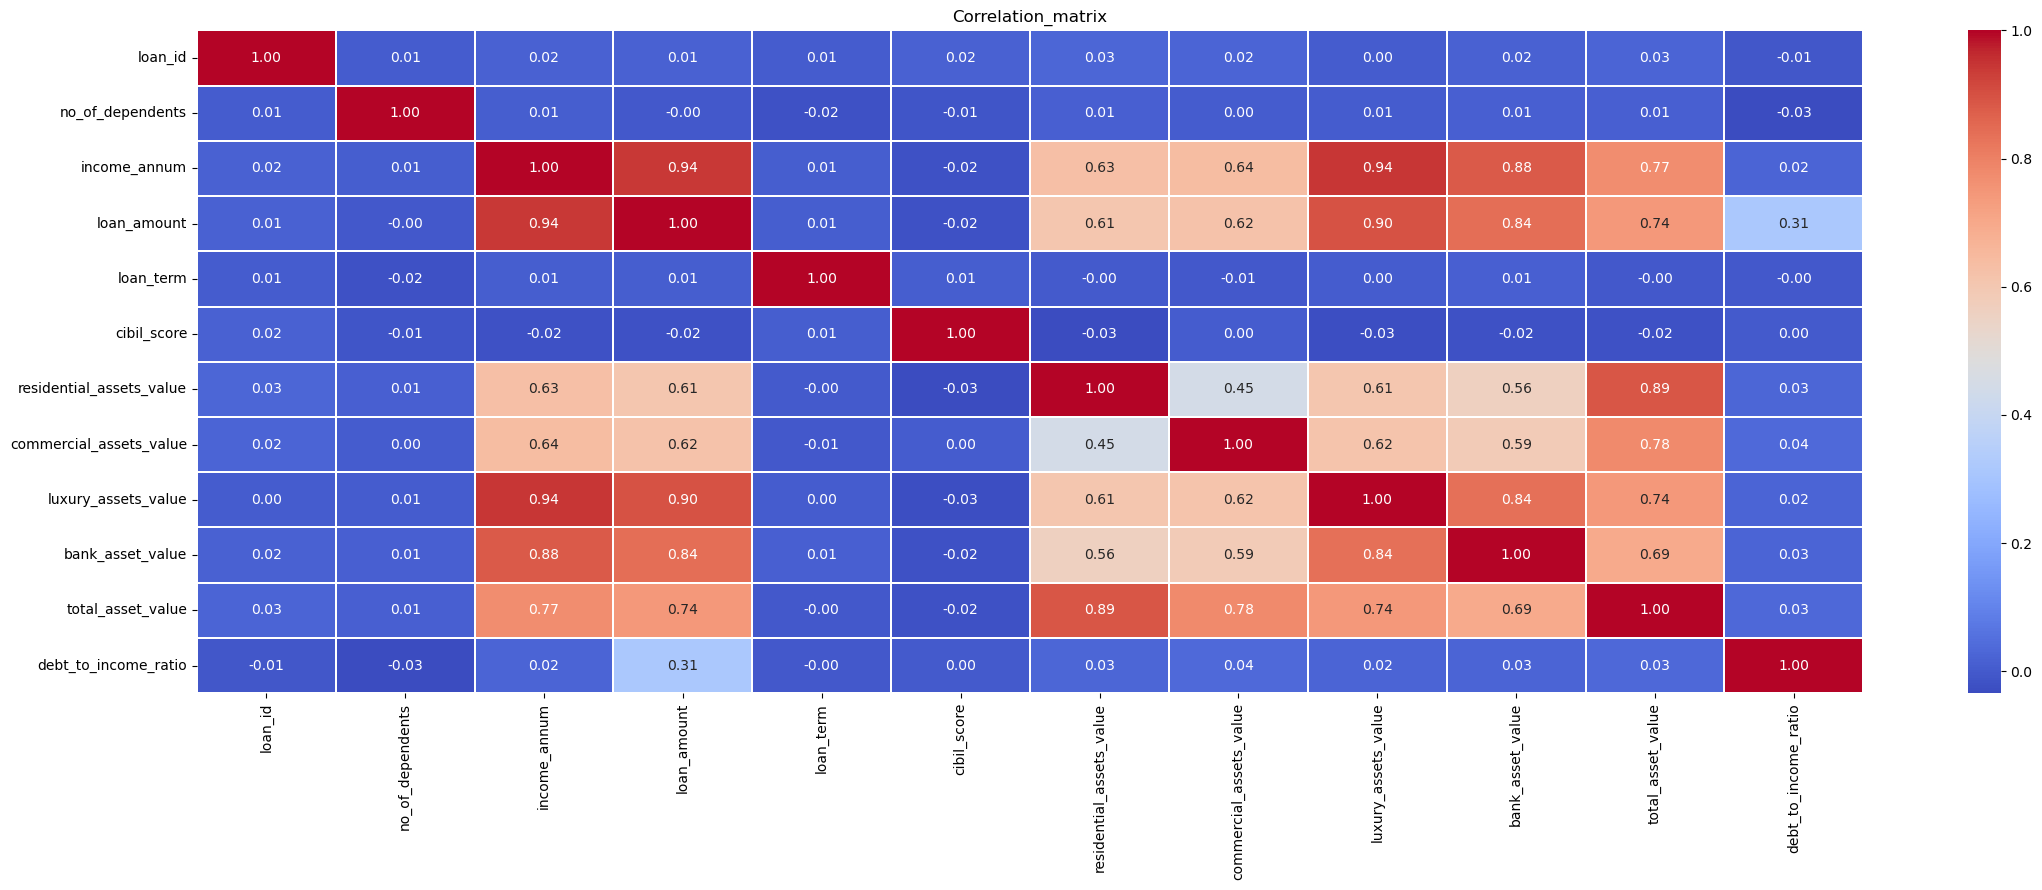

In [59]:
numeric_df = df.select_dtypes(include=["number"])


correlation_matrix = numeric_df.corr(method='spearman')

plt.figure(figsize=(23, 9))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1)

plt.title("Correlation_matrix")

plt.tight_layout()
plt.show()

- There is a high correlation between loan amount 

- General Observations:

**High Positive Correlations**

- income_annum, loan_amount, luxury_assets_value, and total_asset_value exhibit strong positive correlations among each other. 
- luxury_assets_value is strongly related to both income_annum (0.93) and loan_amount (0.86), implying individuals with higher incomes tend to own more luxury assets.

**Moderate Correlations**

residential_assets_value has a moderate correlation with variables such as income_annum (0.63) and loan_amount (0.59), indicating that residential assets increase with income and loan amounts but not as strongly as luxury assets.

**Weak or Negligible Correlations**

Variables such as no_of_dependents, loan_term, and cibil_score show weak or near-zero correlations with most other


## Asset Class Vs Loan Approval 

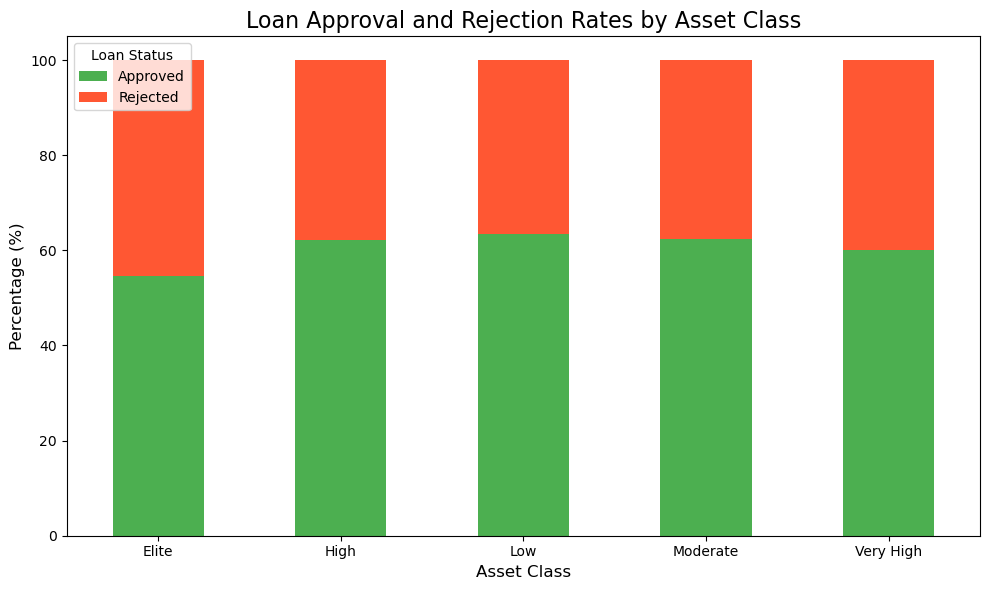

In [60]:
#fun ction to allocate the class on assets, according to the bins
def asset_label(value):
    if 500000<=value<=1000000:
        return 'Low'
    if 1000001<=value<=20000000:
        return 'Moderate'
    if 20000001<=value<=40000000:
        return 'High'
    if 40000001<=value<=60000000:
        return 'Very High'
    else:
        return 'Elite'

# Creating asset_label column applying now our function above
df['asset_labels'] = df['total_asset_value'].apply(asset_label)

# Grouping with the loan status
df_assets = df.groupby(['asset_labels', 'loan_status']).size().reset_index()

# Creating a pivot table
assets_pivot_table = df_assets.pivot(index='asset_labels', columns='loan_status', values=0)

# Getting percentages from our pivot table
row_totals = assets_pivot_table.sum(axis=1)
row_percentages = assets_pivot_table.div(row_totals, axis=0)*100

# Creating a combined bar plot to visualize our data
row_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4CAF50', '#FF5733'])

plt.title('Loan Approval and Rejection Rates by Asset Class', fontsize=16)
plt.xlabel('Asset Class', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Loan Status', labels=['Approved', 'Rejected'], loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



**FINDINGS BY RODGERS**
1. Elite Class
Approval Rate: 62.93%
Rejection Rate: 37.07%
**Explanation**
Elite applicants generally have significant financial stability, reflected in their high asset values. The approval rate is relatively high because They likely meet collateral requirements.

2. Moderate Class
Approval Rate: 64.08% (highest)
Rejection Rate: 35.92%
Explanation:
Moderate-class applicants have an optimal mix of asset value and manageability, resulting in the highest approval rate. Their higher success rate is likely because:

They present moderate collateral, balancing lender risk and applicant repayment ability.
They may have consistent income profiles or manageable loan amounts.
3. High Class
Approval Rate: 60.99%
Rejection Rate: 39.00%
Explanation:
While still favorable, approval rates for the High class are lower than Moderate due to:

Possible inconsistencies in repayment capacity despite high asset value.
Larger requested loan amounts relative to income, increasing perceived risk.
4. Very High Class
Approval Rate: 61.86%
Rejection Rate: 38.14%

Explanation:
Very High asset applicants are approved at rates similar to the High class. However, a slightly lower approval rate than Elite or Moderate applicants might result from:

High loan requests with longer terms, which increase lender risk.
Variability in the ability to meet additional conditions like guarantors or credit history.
5. Low Class
Approval Rate: 54.55% (lowest)
Rejection Rate: 45.45%
Explanation:
Low asset applicants face the most challenges in getting loans approved due to:
Insufficient collateral or financial security.
Higher likelihood of poor credit scores or income instability.
Potential risk of over-indebtedness, leading lenders to decline their applications.

Observed Trends
Approval Rates Increase with Asset Class:

Applicants with higher asset values (Elite, Moderate) have better approval rates because they provide greater financial security to lenders.
Moderate Class Outperforms Elite in Approval Rate:

Despite having slightly fewer assets than Elite applicants, Moderate applicants have a higher approval rate. This could indicate they are better aligned with typical loan product requirements (e.g., loan amount requested relative to income and assets).
High and Very High Classes See Similar Trends:

Approval rates stabilize in these classes, suggesting lenders view them similarly in terms of risk, likely due to comparable loan requests and financial profiles.
Low Asset Class Faces Maximum Challenges:

Their approval rate is significantly lower, likely reflecting the difficulties of securing loans without substantial collateral or financial backing.

Key Drivers Behind These Trends
Collateral Value:
Higher assets provide stronger guarantees to lenders, directly improving approval chances.

Debt-to-Income Ratio:
Applicants with balanced debt-to-income ratios are perceived as less risky, contributing to higher approval rates.

Loan Request Amounts:
Applicants in higher asset classes might request larger loans, which introduces variability in approval rates.

Creditworthiness:
Credit scores and financial history, though not visible in this analysis, likely play a critical role in rejections, especially in Low and High classes.


## Box plot for correlation 

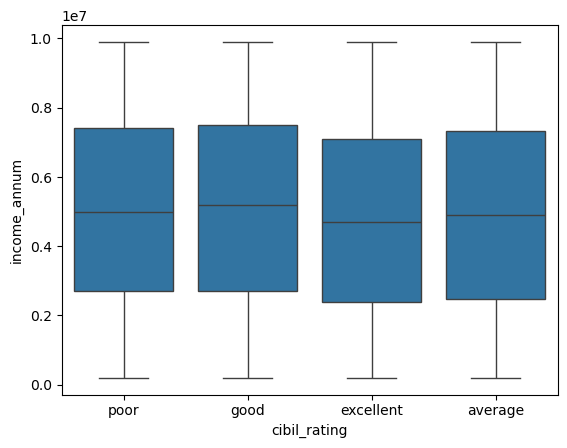

In [61]:
sns.boxplot(y='income_annum',x='cibil_rating',data=df);


**Similar Median Income**

- The median annual income (central line in the boxes) is approximately the same across all credit rating categories. This suggests that credit rating categories do not strongly differentiate based on median income.
- The range (difference between the minimum and maximum incomes) is fairly consistent across all cibil_rating categories, indicating that the variability in income is similar irrespective of credit rating.

- There is no significant increase or decrease in income as credit rating improves (e.g., moving from "poor" to "excellent"). This implies that annual income may not be a primary determinant of credit rating.

<Axes: xlabel='cibil_rating', ylabel='loan_amount'>

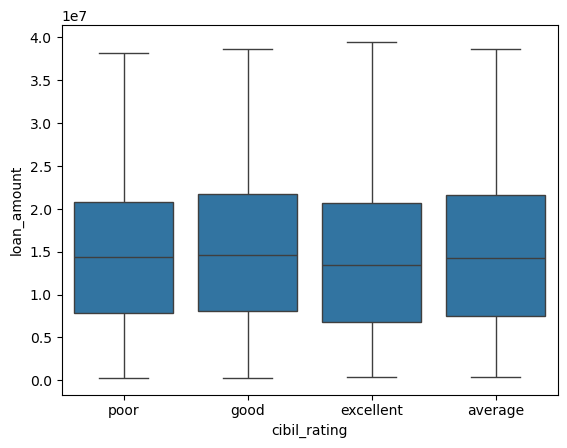

In [62]:
sns.boxplot(y='loan_amount',x='cibil_rating', data=df)


- The median loan amount is approximately the same across all credit rating categories. This suggests that loan amount do not strongly differentiate based on median income.
- The range (difference between the minimum and maximum incomes) is fairly consistent across all cibil_rating categories, indicating that the variability in income is similar irrespective of credit rating.

- There is no significant increase or decrease in income as credit rating improves (e.g., moving from "poor" to "excellent"). This implies that annual income may not be a primary determinant of credit rating.

<Axes: xlabel='cibil_rating', ylabel='loan_term'>

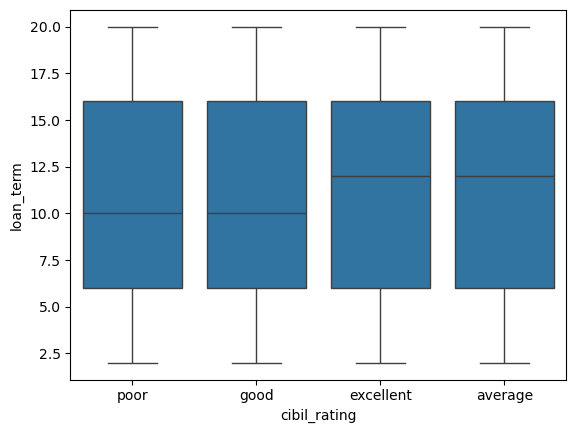

In [63]:
sns.boxplot(y='loan_term',x='cibil_rating', data=df)


In [64]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'income_levels', 'loan_range', 'cibil_rating', 'total_asset_value',
       'debt_to_income_ratio', 'asset_labels'],
      dtype='object')

## Correlation between categorical vs categorical

In [66]:

# Grouping with the loan status
df_cibil = df.groupby(['cibil_rating', 'loan_status']).size().reset_index()
df_cibil 

# Creating a pivot table
pivot_table = df_cibil.pivot(index='cibil_rating', columns='loan_status', values=0)

# Getting percentages from our pivot table
row_totals = pivot_table.sum(axis=1)
row_percentages = pivot_table.div(row_totals, axis=0)*100
row_percentages 


loan_status,Approved,Rejected
cibil_rating,,
average,99.700599,0.299401
excellent,99.419729,0.580271
good,99.317872,0.682128
poor,10.384395,89.615605


In [67]:
## Claculate approval rates 
pivot_table['approval_rate'] = pivot_table['Approved']/(pivot_table['Approved'] + pivot_table['Rejected'])* 100
                                                        
pivot_table                                                      

loan_status,Approved,Rejected,approval_rate
cibil_rating,,,
average,666,2,99.700599
excellent,1028,6,99.419729
good,728,5,99.317872
poor,181,1562,10.384395


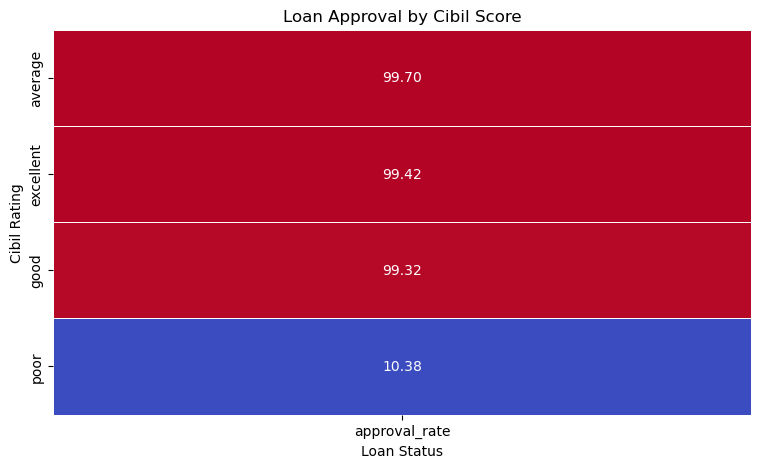

In [69]:
# create a heatmap 
plt.figure(figsize=(9, 5))
sns.heatmap(pivot_table[['approval_rate']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=False)

plt.title('Loan Approval by Cibil Score')
plt.xlabel('Loan Status')
plt.ylabel('Cibil Rating')
          
plt.show()


In [71]:
# from plotly.express import px
# # Create the heatmap
# fig = px.imshow(
#     pivot_table[['approval_rate']].T,
#     labels = dict(y= 'cibil_rating', x='loan_status', color='blues', cbar=False, linewidths=1),
#     text_auto='.2f',
#     color_continuous_scale= 'magenta', aspect='auto',
   
#     title='Loan Approval by Cibil Score',
# )

# # Update layout for better readability
# fig.update_layout(
#     xaxis_title='Loan Status',
#     yaxis_title='Approval Rate',
#     coloraxis_showscale=True,
# )

# fig.show()

ImportError: cannot import name 'px' from 'plotly.express' (/home/western/anaconda3/lib/python3.12/site-packages/plotly/express/__init__.py)

In [ ]:
# ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
#              'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
#              'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
#              'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
#              'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
#              'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
#              'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
#              'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
#              'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
#              'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
#              'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
#              'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
#              'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
#              'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
#              'ylorrd'].

In [ ]:
sns.boxplot(y = df['no_of_dependents'],x = df['loan_status'])

## Multivariate Analysis 

<Axes: xlabel='bank_asset_value', ylabel='loan_amount'>

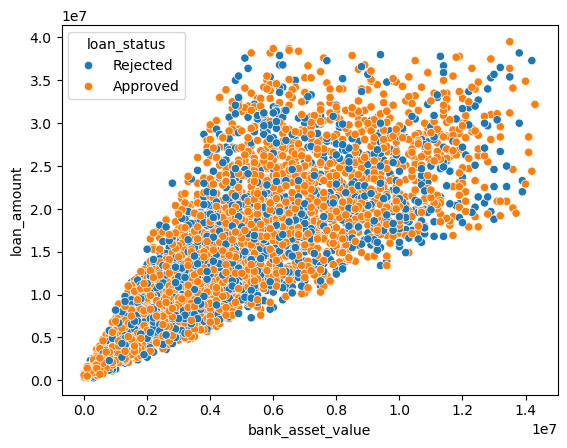

In [72]:
# Multivariate Analysis
sns.scatterplot(x='bank_asset_value', y='loan_amount', data=df, hue='loan_status')




<Axes: xlabel='loan_amount', ylabel='income_annum'>

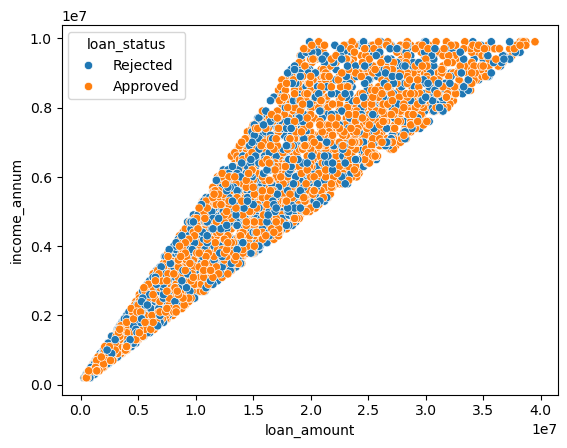

In [73]:
sns.scatterplot(y='income_annum',x='loan_amount', data=df, hue='loan_status')

In [76]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'income_levels', 'loan_range', 'cibil_rating', 'total_asset_value',
       'debt_to_income_ratio', 'asset_labels'],
      dtype='object')